In [ ]:
"""
투영, 다양체
 - 투영 : 결정된 축으로 사이즈를 결정하면 차원이 줄어듬 
 - 다양체 : 여러방면에서 데이터를 봐도 같은 형태
PCA 주성분분석 (PCA, kernalPCA : 비선형 특징추출, incremntalPCA : 대용량 데이터라면 하드디스크에 저장하고 일부 학습 partial_fit)
TruncatedSVD ( 에서 정방행렬분해 ) : PCA는 SVD로 만들어져 있음 : 변수선택을 포함
 - 선형적인 특성을 추출(선형대수에 의한 계산)
 - 데이터 -> 공분산 행렬, 상관계수행렬(변수간 상관성)을 구함 -> 고유값 분해(eigen decomposition) 
    -> 고유치, 고유벡터(새로운축) -> 새로운 축으로 데이터를 변환 (transform) 
    -> ★재표현데이터(다중공선성이 없는 데이터 : 직교하는 데이터)
    -> 노이즈제거 -> 모델 적합성 상승
 - 다른방법 : PCA결과를 변수로 추가하면 정확도가 올라가는 효과가 있다
MDS 다차원척도법
 - 랜덤하게(임의의) 결정된 행렬을 거듭제곱( 자신의 전치행렬 ) -> 행렬 * 전치행렬 -> 정방행렬, 대칭행렬 출력
     -> 고유값 분해 -> 고유치, 고유벡터(직교하는 축) -> 원하는 열벡터
     -> 데이터에 적용하게 되면 차원축소됨 
     ex : 1000(sample) x 100(변수) = 100x2 => 1000x2 => 시각화 => 통찰을 얻기위해..
     
"""


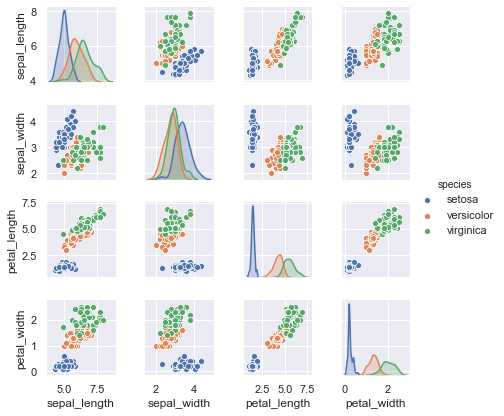

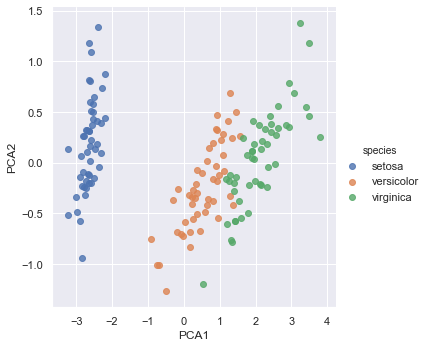

In [2]:
import seaborn as sns # 분석데이터를 출력하는 패키지
import matplotlib.pyplot as plt

sns.set() # 시본 초기화
iris = sns.load_dataset("iris")
iris.head()
sns.pairplot(iris, hue="species", height=1.5)# 변수간 상관도
X_iris = iris.iloc[:,:4] # 독립 변수 (0~3)
# 데이터 준비

from sklearn.decomposition import PCA

# 차원축소가 되더라도 모든 데이터를 고려한 차원축소
model = PCA(n_components=2) #정방행렬 변수가 4개 -> 4x4고유벡터 중 2열만 취하라(차원축소)

# 변수변화 4 -> 2 (원래 있던 2개의 축도 기존 데이터를 고려해서 생성된 축이기에 성분은 그대로 보존된다)
model.fit(X_iris) # 2개의 축이 생성
X_2D = model.transform(X_iris) # 데이터를 재표현
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# 선형회귀 그래프 출력
sns.lmplot("PCA1","PCA2",hue='species', data=iris, fit_reg=False)
plt.show()


In [10]:
# 문제로 나왔음 ★
# 메일로 온 자료
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

 

import pandas as pd

df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10) 

X.shape: (60, 3)


C:\Users\2-18\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\2-18\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [5]:
# 문제로 나왔음 ★
#SVD에 대한  이해
#공분산 계산
# 2개의 변수가 있다면 sigma((X-X의 평균)(Y-Y의평균))/(n-1)
X_cen = X - X.mean(axis=0) #열평균
print(X_cen)# 60 x 3

# 전치행렬 3x60 60x3 => 3x3
# 내적의 의미는 
# 공분산 행렬을 구함
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[-1.03976771e+00 -7.60238460e-01 -3.32880482e-01]
 [-3.17841939e-02  3.90260570e-01 -3.64766659e-02]
 [-9.77238797e-01 -6.73862060e-01 -3.20757101e-01]
 [-9.44190485e-01  7.70779228e-04 -4.97304144e-02]
 [-7.87164831e-01 -5.10641487e-02  1.19970744e-01]
 [ 1.09409378e+00  1.15762056e-01  2.45551498e-01]
 [-1.04665623e+00 -8.53165791e-01 -2.05241169e-01]
 [ 6.49452398e-01 -4.82750342e-01 -7.94325731e-02]
 [ 9.92128132e-01  3.06140931e-01  3.96278747e-01]
 [ 5.25509785e-01  4.67955007e-01  1.62461684e-01]
 [-1.01367188e+00 -2.00458976e-01 -1.93074561e-01]
 [ 1.10841362e+00  7.29745189e-02 -1.82449496e-03]
 [-1.01744457e+00 -4.77653389e-01 -2.29165228e-01]
 [-9.71704237e-01 -7.08910047e-01 -2.10833327e-01]
 [ 1.07688965e+00 -3.86770525e-02  2.63501050e-02]
 [-3.70113351e-01  2.44018985e-01 -7.21578839e-03]
 [ 6.66958762e-01 -4.82702763e-01 -1.30819379e-01]
 [ 6.58961570e-01  4.94893306e-01  1.74868964e-01]
 [ 8.53335653e-01 -3.77076159e-01 -9.31775506e-02]
 [-1.08496872e+00 -6.91462364e-

In [8]:
w, v = np.linalg.eig(X_cov)
print('eigenvalue :', w) # 고유치, 정렬된 결과, 분산이 가장 큰것을 기준(분산이 크면 주성분)
print('eigenvector :\n', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector :
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [10]:
print('설명력 : ', w/w.sum()) 
"""
 축의 설명력 : 주성분이 전체데이터에 미치는 영향
 종속변수에 대한 설명력
"""

설명력 :  [0.84248607 0.14631839 0.01119554]


'\n 축의 설명력 : 주성분이 전체데이터에 미치는 영향\n 종속변수에 대한 설명력\n'

In [12]:
#특이행렬분해 -> 비정방행렬에 대해서 실행 ( 특수한 경우가 정방 행렬 -> eigen)
U, D, V_t = np.linalg.svd(X_cen)

print('singular value : ', D)
print('singular vector :\n', V_t.T) # 위의 벡터값과 같다 다만 svd결과는 전치되어있다

singular value :  [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [13]:
# 사이즈가 반
print('explained variance ratio :', D**2/np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [11]:
from sklearn.decomposition import PCA # svd 기반
pca = PCA(n_components=3)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print('singular value :', pca.singular_values_) # svd 와 값이 같다
print('singular vector :\n', pca.components_.T)
print('eigen_value :', pca.explained_variance_) # 값으로 나타난 설명력
print('explained variance ratio :\n', pca.explained_variance_ratio_) # 비율설명력

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]
eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio :
 [0.84248607 0.14631839 0.01119554]


In [36]:
# PCA에서 적절한 차원수를 결정 : 설명력으로 판단
cumsum = np.cumsum(pca.explained_variance_ratio_)#축 누적합
d = np.argmax(cumsum >= 0.95) + 1 # 95%를 설명하는 설명력의 인덱스
print('선택할 차원수 :', d) # 2 미미한 영향이고 noise로 판단 : 2개의 축만 써도 데이터 표현에 문제없다는 뜻(원래는 3개)

선택할 차원수 : 2


In [17]:
pca = PCA(n_components=0.95) # 정수: 컴포넌트갯수, 소수: 누적 설명합
X_proj = pca.fit_transform(X) # 새로운 축으로 변환된 데이터

# print(X_proj)
print('principal component vec :\n', pca.components_.T)# 2개축

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


In [ ]:
"""
    eigen분해 / svd / scikits의 PCA 했다
    -95% 설명력이 갖는 변수 선택을 했다
    --------------------------------------
    -mnist 784차원 -> 154차원 축소(차원축소) -> 축소된 데이터로 이미지 원래의 이미지 복원
    -PCA의 유용성확인을 할것이다
"""

In [32]:
# 2.2.4 버전(별도 설치할경우)에서 텐서플로에서 케라스와 병합
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(-1, 28*28) # 784를 일차원변환
pca = PCA(n_components=0.95) # 설명력
X_reduced = pca.fit_transform(train_x) # 새로운축으로 변환된 데이터
print(pca.n_components_) # 154개축 : 변수의 갯수

154


In [33]:
# 축값 결정되어 있음 => 역으로 이용해서 원복
X_recovered = pca.inverse_transform(X_reduced) # 원래의 이미지 사이즈로 원복
print(X_recovered)

[[ 2.64687454e-14  8.26444492e-13  2.78622423e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.64609603e-15  2.80862210e-14  6.43226537e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.28377776e-15 -1.11176764e-13  1.61846320e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.88183138e-15  2.61614400e-13  2.12002255e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.07364675e-16 -6.43926008e-14 -1.59155963e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.73667409e-15  2.62076452e-14  5.57684626e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [34]:
#emial data
import matplotlib
import matplotlib.pyplot as plt
def plot_digits(instances, images_per_row=5, **options):
    size = 28 # 전제 이미지 사이즈가 28에 해당하는 함수
    images_per_row = min(len(instances), images_per_row) # 행당 이미지 사이즈 결정
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1 # 행수 결정
    row_images = []
    n_empty = n_rows * images_per_row - len(instances) # 사각형 중에 부족한 부분
    images.append(np.zeros((size, size * n_empty))) # 비어있는 가짜 이미지 사이즈
    for row in range(n_rows): # 행이미지를 결합해서
        # 범위값으로 이미지 위치 지정
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off") 

(60000, 154)
(60000, 784)
(60000, 784)
28.571428571428573



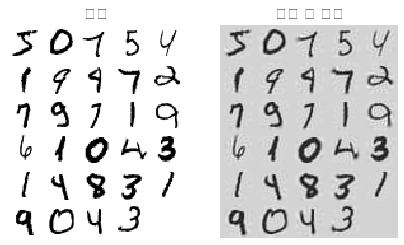

In [45]:
print(X_reduced.shape)
print(X_recovered.shape)
print(train_x.shape)
print(60000/2100) # 약 29장을 출력 
print()
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100]) #2100씩 건너뛰기
plt.title('원본', fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('압축 후 복원', fontsize=16)
plot_digits(X_recovered[::2100])

In [46]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154) # 변수 개수로 지정
for batch_x in np.array_split(train_x, n_batches):# 데이터 서브배열로 분할
    print('.', end="")
    inc_pca.partial_fit(batch_x) # 부분 피팅
    
X_reduced = inc_pca.transform(train_x) # 새로운축으로 변환



....................................................................................................

In [47]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced) # 원래 이미지로 복원

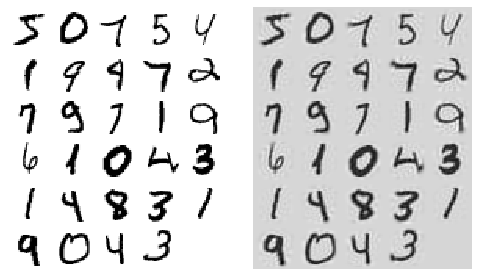

In [49]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [50]:
print(60000*784)
print( (60000*154) / (60000*784)) #80%의 메모리 절감

47040000
0.19642857142857142


In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))




['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
테스트 세트 정확도: 0.62
스케일 조정된 테스트 세트의 정확도: 0.97


C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
"""
문제 위에 스케일된 데이터에 대하여
 - 누적설명력을 이용한 그래프를 출력하고 PCA를 위한 적당한 component수를 결정하시오
 - 컴포넌트 수를 6개 9개 20개인 경우에 정확도를 비교해보시오
"""
print(X_train)
print('-----')
print(X_test)
print('-----')

from sklearn.decomposition import PCA
Qpca1 = PCA(n_components=0.95)
Qpca1.fit_transform(X_train)

print('principal component vec :\n', Qpca1.components_.T)# 2개축
# print('eigen_value :\n', Qpca1.explained_variance_) # 값으로 나타난 설명력

# PCA에서 적절한 차원수를 결정 : 설명력으로 판단
cumsum2 = np.cumsum(Qpca1.explained_variance_ratio_)#축 누적합
d2 = np.argmax(cumsum2 >= 0.95) + 1 # 95%를 설명하는 설명력의 인덱스
print('선택할 차원수 :', d2) # 2 미미한 영향이고 noise로 판단 : 2개의 축만 써도 데이터 표현에 문제없다는 뜻(원래는 3개)



Qpca1 = PCA(n_components=6)
Qpca1.fit(X_train)
Qpca1X_train = Qpca1.transform(X_train)
Qpca1X_test = Qpca1.transform(X_test)
svm.fit(Qpca1X_train, y_train)
print('Qpca2 eigen_value :\n', Qpca1.explained_variance_) # 값으로 나타난 설명력
print("테스트 세트 정확도: {:.2f}".format(svm.score(Qpca1X_test, y_test)))

Qpca1 = PCA(n_components=9)
Qpca1.fit(X_train)
Qpca1X_train = Qpca1.transform(X_train)
Qpca1X_test = Qpca1.transform(X_test)
svm.fit(Qpca1X_train, y_train)
print('Qpca2 eigen_value :\n', Qpca1.explained_variance_) # 값으로 나타난 설명력
print("테스트 세트 정확도: {:.2f}".format(svm.score(Qpca1X_test, y_test)))

Qpca1 = PCA(n_components=20)
Qpca1.fit(X_train)
Qpca1X_train = Qpca1.transform(X_train)
Qpca1X_test = Qpca1.transform(X_test)
svm.fit(Qpca1X_train, y_train)
print('Qpca2 eigen_value :\n', Qpca1.explained_variance_) # 값으로 나타난 설명력
print("테스트 세트 정확도: {:.2f}".format(svm.score(Qpca1X_test, y_test)))




[[1.522e+01 3.062e+01 1.034e+02 ... 2.356e-01 4.089e-01 1.409e-01]
 [1.496e+01 1.910e+01 9.703e+01 ... 1.489e-01 2.962e-01 8.472e-02]
 [1.468e+01 2.013e+01 9.474e+01 ... 1.609e-01 3.029e-01 8.216e-02]
 ...
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [1.403e+01 2.125e+01 8.979e+01 ... 7.963e-02 2.226e-01 7.617e-02]
 [1.303e+01 1.842e+01 8.261e+01 ... 5.013e-02 1.987e-01 6.169e-02]]
-----
[[1.469e+01 1.398e+01 9.822e+01 ... 1.108e-01 2.827e-01 9.208e-02]
 [1.317e+01 1.866e+01 8.598e+01 ... 2.088e-01 3.900e-01 1.179e-01]
 [1.295e+01 1.602e+01 8.314e+01 ... 1.056e-01 3.380e-01 9.584e-02]
 ...
 [1.505e+01 1.907e+01 9.726e+01 ... 1.120e-01 2.282e-01 6.954e-02]
 [1.940e+01 2.350e+01 1.291e+02 ... 1.564e-01 2.920e-01 7.614e-02]
 [1.189e+01 2.117e+01 7.639e+01 ... 8.263e-02 3.075e-01 7.351e-02]]
-----
principal component vec :
 [[ 5.00773737e-03]
 [ 2.35405425e-03]
 [ 3.45042039e-02]
 [ 5.11232129e-01]
 [ 4.02251248e-06]
 [ 3.92892801e-05]
 [ 8.11707954e-05]
 [ 4.6728776

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
"""
오후 시작 ===========================================================================================================================================================================================================
"""

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


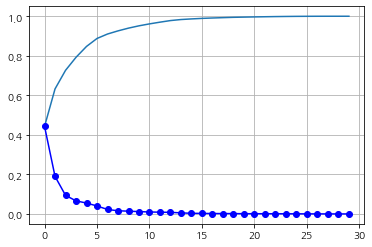

In [71]:
"""
문제 풀이
"""
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data) # 변형
pca = PCA(n_components=30)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) # 변형된 데이터
print(pca.explained_variance_ratio_)
plt.grid(True)
# 분산값들을 확률값으로 변경한값
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # 설명력
plt.grid(True)
plt.plot(pca.explained_variance_ratio_, 'bo-')
         
         


In [72]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for x in [6,9,20]: # 97% 원래변수 30->9
    pca = PCA(n_components=x)
    pca.fit(X_train_scaled)
    X_t_train = pca.transform(X_train_scaled)
    X_t_test = pca.transform(X_test_scaled)
    svm = SVC(C=100)
    svm.fit(X_t_train, y_train)
    print("SVM 테스트 정확도:{:.2f}".format(svm.score(X_t_test, y_test))) # 테스트 데이터로 평가
# 축정보 : 축 == components_

SVM 테스트 정확도:0.92
SVM 테스트 정확도:0.94
SVM 테스트 정확도:0.95


C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
print("PCA 주성분 형태: {}".format(pca.components_.shape)) # (축, 변수)
print("PCA 주성분 :\n {}".format(pca.components_)) # transform, inverse_transform 기준이 될수 있는 축

PCA 주성분 형태: (20, 30)
PCA 주성분 :
 [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.0927

Text(0, 0.5, '주성분')

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


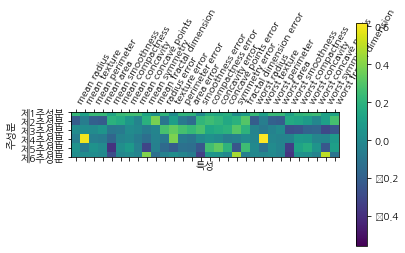

In [88]:
plt.matshow(pca.components_, cmap='viridis') #  matrix를 image로 출력

plt.yticks([0, 1, 2, 3, 4, 5], ["제1주성분", "제2주성분", "제3주성분", "제4주성분", "제5주성분", "제6주성분"])
plt.colorbar() # 0(black) ~ 255(white)
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

(87, 65)


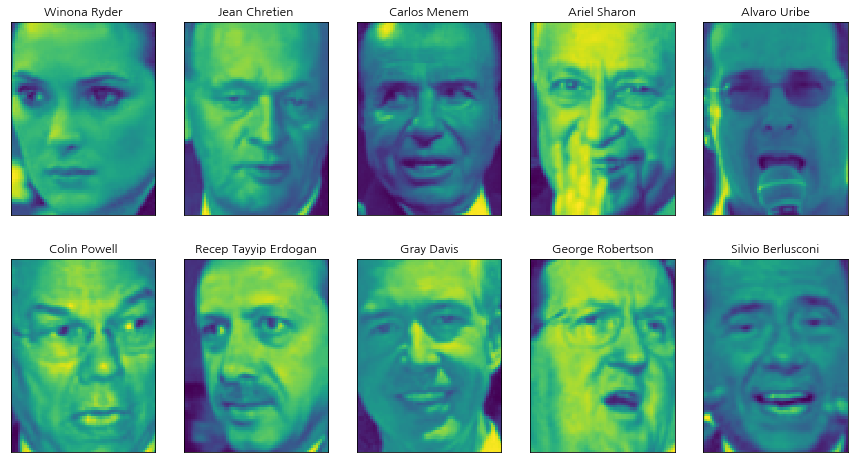

In [89]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape)
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks' : (), 'yticks' : ()})# xtick ytick 없음

# 이름 테이블은 target_names
# 실제 target에는 테이블 인덱스
# ex: kmeans에는 컬러값 table => 센터점
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [96]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [119]:
# 한사람당 몇장의 사진이 있는가?
import numpy as np
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if(i+1) % 3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [103]:
import pandas as pd
pd.Series(people.target).value_counts()

14    530
10    236
58    144
12    121
15    109
     ... 
22     20
43     20
30     20
46     20
4      20
Length: 62, dtype: int64

In [122]:
"""
이미지 갯수를 통일 - 1종에 50명으로 제한
"""
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target): # 사람 종류 1, 2, 3 ...
    mask[np.where(people.target == target)[0][:50]]  = 1 # 50명으로 제한
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255. # 이미지 정규화

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.23


In [133]:
#이미지 하나당 변수 개수
print(people.images[0].shape)
print(people.images[0].shape[0] * people.images[0].shape[1]) # 변수갯수

(87, 65)
5655


In [129]:
from sklearn.decomposition import PCA
# 5655개의 변수중 특징 추출하여 100개만으로 실행
# ZIP 점수 졍규화 하듯이 이미지 정규화실행
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train) 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('훈련차원 : {}'.format(X_train_pca.shape))

훈련차원 : (1547, 100)


In [130]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


(100, 5655)


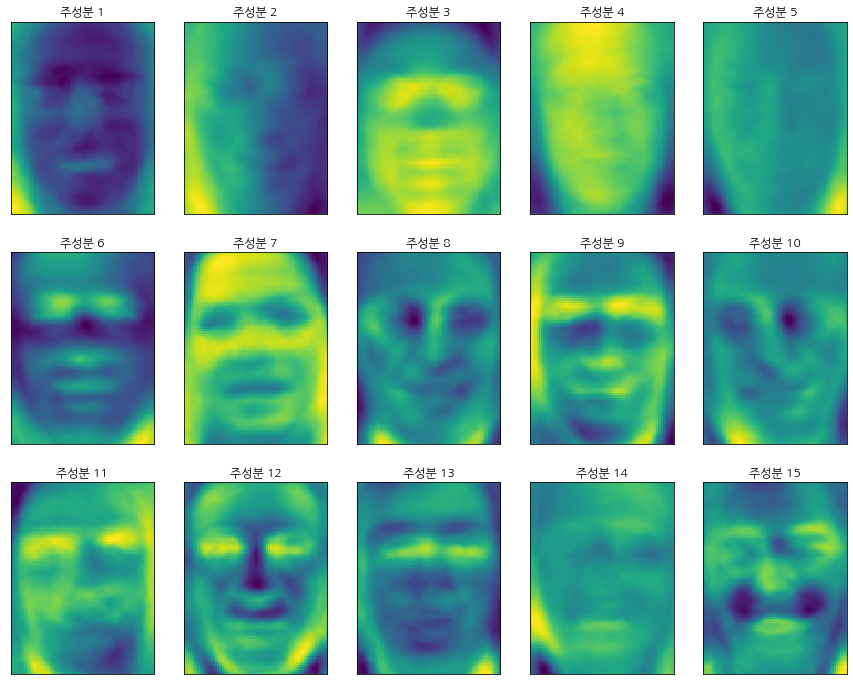

In [136]:
# 축 : 100개 #변수 5655를 -> (87, 65)로 reshape하면 이미지화 된다
print(pca.components_.shape)
fig , axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks":(), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

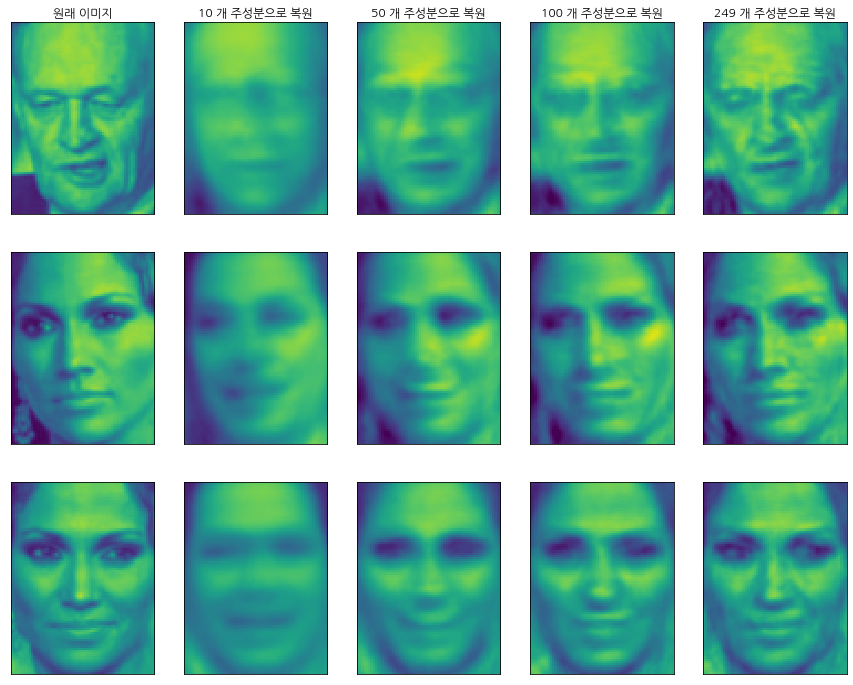

In [142]:
# 문제로 나왔음 ★
# 원래 이미지 복원 ★
reduced_images = []
for n_components in [10, 50, 100, 249]:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test) # 5655 -> 10, 50, 100, 249
    X_test_back = pca.inverse_transform(X_test_pca) # 원래 이미지로 복원 5655 # 손실 발생
    reduced_images.append(X_test_back)
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, ax in enumerate(axes):
    ax[0].imshow(X_test[i].reshape(image_shape), vmin=0, vmax=1) # 원본
    for a, X_test_back in zip(ax[1:], reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1) # 복원 이미지
        
axes[0, 0].set_title("원래 이미지")
for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 249]):
    ax.set_title("%d 개 주성분으로 복원" % n_components)

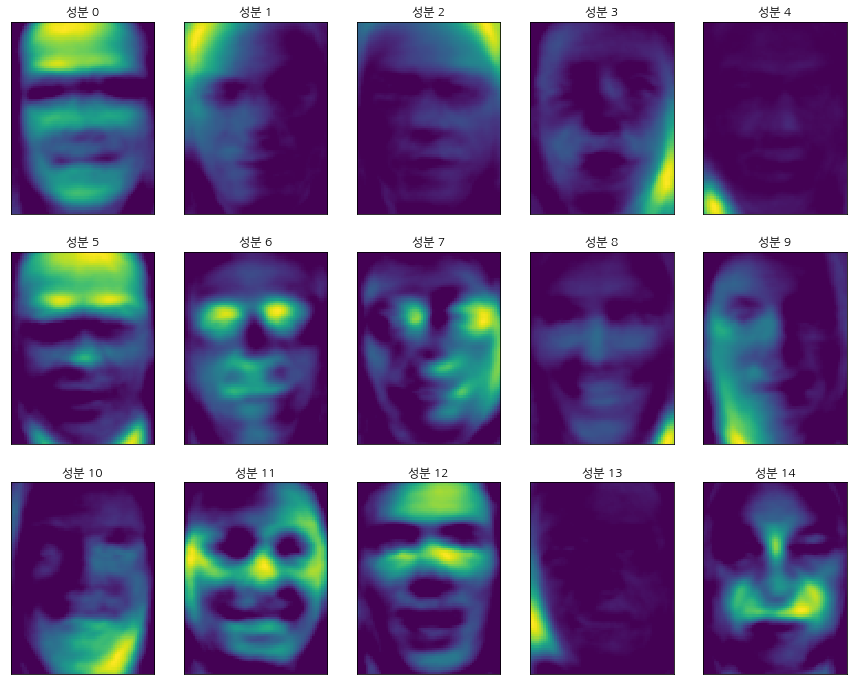

In [145]:
"""
NMF (non-negative matrix factorization ) 
 - PCA(음수 양수 동시에 있으면 음수 양수를 합침 - 특징이 소실)와 유사
 - 비음수 행렬에서 특징을 찾는다
 - (+값만 존재) 비음수 (이미지, 음성, 텍스트)
"""
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0) # 행렬연산
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks":(), "yticks":()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))




In [147]:
# email
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42): # 좌표를 생성
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])] 

C:\Users\2-18\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


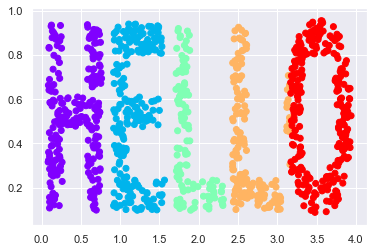

In [148]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

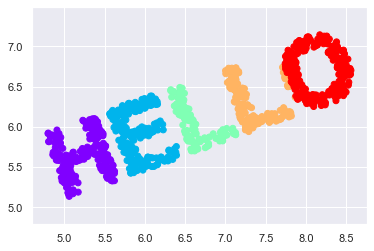

In [150]:
print(X.shape) # 1000개의 정점, x,y 축
def rotate(X, angle):
    theta = np.deg2rad(angle) #radian 변경, 부호에 따라 시계방향, 반시계방향 결정
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]] # x,y에 변경을 가함 = z만 변화없음, z축중심으로 회전 
    print(type(R))
    return np.dot(X, R) # 공간변환
X2 = rotate(X, 20) + 5  # 1000x2 2x2 => 1000x2
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')


In [157]:
# eigen decomposition 고유값 분해
from sklearn.metrics import pairwise_distances # 유클리디안 거리값을 재는 함수, 맨하탄, 민코프스키
D = pairwise_distances(X)
# 1000개의 행 => 거리값행렬 ( 정방행렬, 대칭행렬 )
D.shape

(1000, 1000)

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


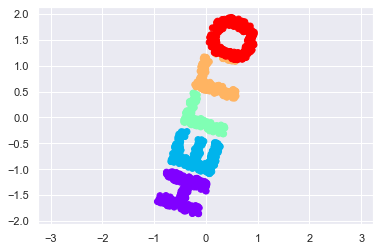

In [155]:
#차원축소
from sklearn.manifold import MDS

# 시각화목적 컴포넌트 2, 3이 온다
# dissimilarity 거리값 precomputed 이미 계산된

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')
print(out)

In [177]:
# 문제로 나왔음 ★
# x : 1000x2 ->  2x3  -> 1000x3
import numpy as np # 공간변환 -> 축 직교 
rng = np.random.RandomState(10)
C = rng.randn(3, 3)
print(C)
print()
print(np.dot(C, C.T)) # 자기자신**2 -> 정방행렬, 대칭행렬 (전치가 필요)
print()

# -> 고유값 분해
e, V = np.linalg.eigh(np.dot(C, C.T))
print('eigenvector : \n', V) # 고유벡터의 사이즈 방향값 1 축과 축사이의 내적 0 : 직교해서
print('eigenvalue : \n', e)

print()
print(np.dot(V[0], V[1])) # 행간 내적
print(np.dot(V[:,0], V[:,1])) #열간 내적

[[ 1.3315865   0.71527897 -1.54540029]
 [-0.00838385  0.62133597 -0.72008556]
 [ 0.26551159  0.10854853  0.00429143]]

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]

eigenvector : 
 [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue : 
 [0.02629875 0.37332691 5.26033253]

0.0
2.7755575615628914e-17


In [181]:
# 차원 확대
def random_projection(X, dimension=3, rseed=42):
    
    assert dimension >= X.shape[1]
    print('--2--')
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    print('C는', C.shape)
    print(np.dot(C, C.T))
    e, V = np.linalg.eigh(np.dot(C, C.T)) # V 3x3의 정직교 축
    print('V는', V.shape)
    print('차원은', V[:X.shape[1]])
    
    return np.dot(X, V[:X.shape[1]]) # 열수 일치 해야함

print('--1--')
print(X.shape)
print(X.shape[1])
print('데이터의 차원은', X.shape)
X3 = random_projection(X, 3) # 3
X3.shape # 1000x3 3차원으로 확장

--1--
(1000, 2)
2
데이터의 차원은 (1000, 2)
--2--
C는 (10, 10)
[[ 6.71225705 -4.08578853 -2.67109051 -2.52512499 -0.70968772 -0.94090353
  -3.12193144  1.53417646  2.54127236 -0.06668224]
 [-4.08578853 11.38604372  5.28604885  0.8048872   6.05785339 -4.53272108
   1.1363972   2.71224636  1.89369635  1.56897668]
 [-2.67109051  5.28604885  6.45401237 -0.61353727  3.42509235 -0.44698516
   1.10818662 -0.21978486  0.05845521  0.21673388]
 [-2.52512499  0.8048872  -0.61353727 12.76572278 -3.1154952  -1.65228729
  -2.35176727 -2.09032607  1.62104008  3.05332554]
 [-0.70968772  6.05785339  3.42509235 -3.1154952   7.9390205  -3.6736871
   0.2805033   6.5246914   0.27959107  2.60568482]
 [-0.94090353 -4.53272108 -0.44698516 -1.65228729 -3.6736871   4.87725484
   1.27474638 -3.31853657 -3.37162538 -2.3903277 ]
 [-3.12193144  1.1363972   1.10818662 -2.35176727  0.2805033   1.27474638
   6.97777364 -2.29556474 -2.57225756 -0.96733283]
 [ 1.53417646  2.71224636 -0.21978486 -2.09032607  6.5246914  -3.318536

(1000, 10)

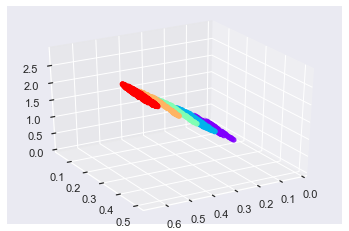

In [182]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=60, elev=30)

(-1.039006410772759,
 1.0377133989963179,
 -2.064666005451132,
 2.1354582444849144)

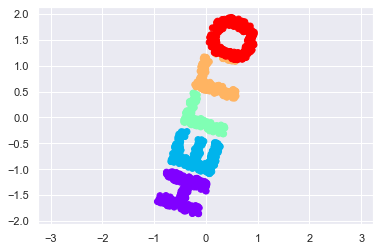

In [183]:
# 3 -> 2차원 MDS
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

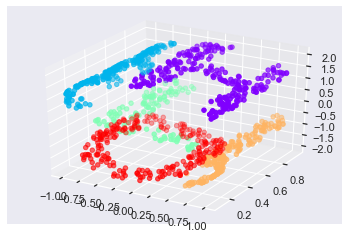

In [184]:
"""
MDS는 선형데이터에 강하다. 선형석을 띈 데이터에 적용 가능
"""
#비선형 처리 해버리기
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi # -2pi ~ pi
    x = np.sin(t) # 굴곡
    y = X[:, 1] 
    z = np.sign(t) * (np.cos(t) - 1) # 중심값을 이동하기 위해
    return np.vstack((x, y, z)).T # 데이터 횡으로 생성 3행 1000열 : 버티컬로 쌓기 
XS = make_hello_s_curve(X)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

(-1.3904556323554291,
 1.2493637628504926,
 -2.3855494181659127,
 2.1899859123555574)

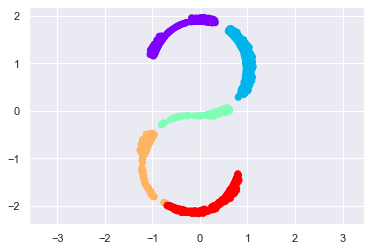

In [185]:
# 차원 축소
# 원본 복원 할수없다
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

(0.15, -0.15)

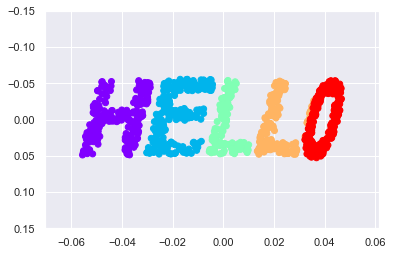

In [187]:
# 복원 
# 근접해 있는 데이터만 고려, 원거리 데이터는 무시
from sklearn.manifold import LocallyLinearEmbedding # LLE
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)